In [1]:
# Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of 
# hardcopy formats and interactive environments across platforms
import matplotlib.pyplot as plt

# NumPy is the fundamental package for scientific computing with Python
import numpy as np

# Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano
import keras

# Import the MNIST dataset directly from the Keras API
from keras.datasets import mnist 

# The Sequential model is a linear stack of layers
from keras.models import Sequential 

#''' Please refer to the wiki of the repository from which this project is located for a more in-depth analysis and explanation
   # of various imports, packages, the model, how it is trained, etc. '''
# Dense - implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise 
# activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias 
# vector created by the layer (only applicable if use_bias is True)

# Dropout - applies Dropout to the input. This consists of randomly setting a fraction rate of input units to 0 
# at each update during training time, which helps prevent overfitting

# Flatten - 'flattens' the input. Does not affect the batch size. Flattening a tensor means to remove all of the dimensions except for one
# Conv2D - 2D convolution layer (e.g. spatial convolution over images). Creates a convolution kernel that is convolved with the layer input 
# to produce a tensor of outputs

# MaxPooling2D - Max pooling operation for spatial data
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Allows for the saving and loading of the model
from keras.models import load_model

from keras import backend as kBackend

Using TensorFlow backend.


In [2]:
# Downloads the MNIST data set directly from the TensorFlow and Keras API. The MNIST dataset contains 60,000 training images
# and 10,000 testing images (with accompanying labels). We separate these two groups into train_imgs and train_labels for the training
# images and training labels, respectively, and test_imgs and test_labels for the test images and test labels respectively
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

In [3]:
# Defines the size of the image as 28 * 28 pixels
img_rows, img_cols = 28, 28

In [4]:
# Reshaping
#
# To be able to use the MNIST dataset with the Keras API, we need to change our array (which is 3-dimensional)
# to 4-dimensional numpy arrays

# https://stackoverflow.com/questions/49057149/expected-conv2d-1-input-to-have-shape-28-28-1-but-got-array-with-shape-1-2
if kBackend.image_data_format() == 'channels_first':
    train_imgs = train_imgs.reshape(train_imgs.shape[0], 1, img_rows, img_cols)
    test_imgs = test_imgs.reshape(test_imgs.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_imgs = train_imgs.reshape(train_imgs.shape[0], img_rows, img_cols, 1)
    test_imgs = test_imgs.reshape(test_imgs.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
# Ensure the values of train_imgs and test_imgs are float. This is done so as we can get decimal points after division
train_imgs = train_imgs.astype('float32')
test_imgs = test_imgs.astype('float32')

# We also must 'normalize' our data, as is always required in neural networks.
# This can be done by dividing the RGB codes of the images to 255
train_imgs /= 255
test_imgs /= 255

In [6]:
# In the model, we can experiment with any number for the first Dense layer. However, the final Dense layer must have
# 10 neurons since there are 10 number classes (0, 1, 2, 3, ..., 9)
num_classes = 10

# 
rate = 0.5

train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
# Create a Sequential model and add the layers
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())  # Flattens the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [8]:
# Determines the number of samples that will be propagated through the neural network
batch_size = 128

# In the context of a neural network, one epoch is the equivalent of one forward pass and one backward pass of
# all the training examples

# With this model, the model seems to peak (in terms of accuracy) at 20 epochs. Any more epochs after this is more or less overkill
num_epoch = 10

# To avoid having to train the model each time the program is ran, the trained model can be loaded from a file
# If no file has been created, then the model is trained and then saved to a file. For the purposes of this notebook, 
# the model will be trained each time

# try:
#     print("Model loaded successfully")
#     model = load_model("model.h5")
# except:
#     print("Failed to load model. Creating new model...")
model_log = model.fit(train_imgs, train_labels,
                          batch_size=batch_size,
                          epochs=num_epoch,
                          verbose=1,
                          validation_data=(test_imgs, test_labels))

model.save_weights("model.h5")

model.save("model.h5")
print("Saved model. Model will now be loaded on next run through")

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 48s 801us/step - loss: 0.2611 - accuracy: 0.9192 - val_loss: 0.0583 - val_accuracy: 0.9820
Epoch 2/10
60000/60000 [==============================] - 48s 807us/step - loss: 0.0881 - accuracy: 0.9743 - val_loss: 0.0450 - val_accuracy: 0.9847
Epoch 3/10
60000/60000 [==============================] - 49s 812us/step - loss: 0.0662 - accuracy: 0.9804 - val_loss: 0.0352 - val_accuracy: 0.9878
Epoch 4/10
60000/60000 [==============================] - 49s 810us/step - loss: 0.0538 - accuracy: 0.9840 - val_loss: 0.0353 - val_accuracy: 0.9874
Epoch 5/10
60000/60000 [==============================] - 49s 811us/step - loss: 0.0471 - accuracy: 0.9858 - val_loss: 0.0318 - val_accuracy: 0.9900
Epoch 6/10
60000/60000 [==============================] - 49s 810us/step - loss: 0.0412 - accuracy: 0.9875 - val_loss: 0.0312 - val_accuracy: 0.9892
Epoch 7/10
60000/60000 [==============================] 

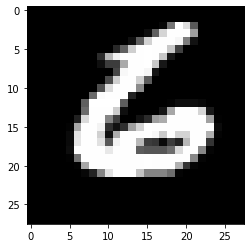

[[7.8598394e-10 3.0229991e-10 2.3736584e-09 1.5166124e-11 2.5477650e-08
  5.0896073e-08 9.9999988e-01 2.2509323e-14 3.6671077e-09 2.4259527e-12]] 
Predicted number:  6


In [9]:
plt.imshow(test_imgs[9999].reshape(28, 28), cmap="gray")
plt.show()

print(model.predict(test_imgs[9999:10000]), "\nPredicted number: ", np.argmax(model.predict(test_imgs[9999:10000])))